# FUTBOL ARGENTINO 2008 - 2022

In [274]:
import pandas as pd #Para manipular mi Data Frame

In [275]:
df = pd.read_excel('./futbolargentino.xlsx', engine = 'openpyxl')
df.head()
# Acá observamos que tenemos varias filas con el valor '-'

,Jugadores,Posicion,Edad,Altura,Pie,Fichado,Equipo Anterior,Valor de mercado,Temporada,Club
0,Nicolás Gianni,Centrocampista,25,1.75,derecho,01/07/2000,Inferiores Argentinos Juniors,800000,2008,Argentinos Juniors
1,Maximiliano Sola,Defensa,22,1.8,izquierdo,-,NaN,-,2008,Argentinos Juniors
2,Nicolás Navarro,Portero,23,1.9,derecho,24/07/2010,SSC Nápoles,2000000,2008,Argentinos Juniors
3,Juan Carrera,Portero,27,1.91,derecho,01/01/2005,inactivo,800000,2008,Argentinos Juniors
4,Sebastián Torrico,Portero,28,1.86,derecho,01/01/2009,CD Godoy Cruz Antonio Tomba,250000,2008,Argentinos Juniors


In [276]:
# Cantidad de datos
df.shape

(12092, 10)

In [277]:
# Tipos de datos
df.dtypes

Jugadores           object
Posicion            object
Edad                object
Altura              object
Pie                 object
Fichado             object
Equipo Anterior     object
Valor de mercado    object
Temporada            int64
Club                object
dtype: object

In [278]:
# Conteo de nulos
df.isna().sum()

Jugadores              0
Posicion               0
Edad                   0
Altura                 0
Pie                  357
Fichado                0
Equipo Anterior     1536
Valor de mercado       0
Temporada              0
Club                   1
dtype: int64

In [279]:
# Contar cuántos '-' hay en cada columna
guiones = df.apply( lambda col: (col == '-').sum() )
print( guiones )

Jugadores              0
Posicion               0
Edad                   0
Altura               268
Pie                   66
Fichado             1539
Equipo Anterior        0
Valor de mercado    1704
Temporada              0
Club                   0
dtype: int64


In [280]:
import numpy as np # Para manejar mis datos numéricos
df.replace('-', np.nan, inplace = True) #Reemplazamos los '-' por NaN para manejar un solo tipo de datos faltantes

In [281]:
# Contamos nuevamente los nulos
df.isnull().sum()

Jugadores              0
Posicion               0
Edad                   0
Altura               268
Pie                  423
Fichado             1539
Equipo Anterior     1536
Valor de mercado    1704
Temporada              0
Club                   1
dtype: int64

In [282]:
# Comprobamos que se hayan aplicado los NaN
df.head()

,Jugadores,Posicion,Edad,Altura,Pie,Fichado,Equipo Anterior,Valor de mercado,Temporada,Club
0,Nicolás Gianni,Centrocampista,25,1.75,derecho,01/07/2000,Inferiores Argentinos Juniors,800000.0,2008,Argentinos Juniors
1,Maximiliano Sola,Defensa,22,1.80,izquierdo,NaN,NaN,NaN,2008,Argentinos Juniors
2,Nicolás Navarro,Portero,23,1.90,derecho,24/07/2010,SSC Nápoles,2000000.0,2008,Argentinos Juniors
3,Juan Carrera,Portero,27,1.91,derecho,01/01/2005,inactivo,800000.0,2008,Argentinos Juniors
4,Sebastián Torrico,Portero,28,1.86,derecho,01/01/2009,CD Godoy Cruz Antonio Tomba,250000.0,2008,Argentinos Juniors


In [283]:
# Como extra, me pareció reelevante para el futuro dashboard crear una nueva columna con los futbolistas surgidos de inferiores
# Filtra filas donde 'Equipo Anterior' contiene la palabra 'inferiores'
filasInferiores = df[df['Equipo Anterior'].str.contains('inferiores', case = False, na = False)] 
# case = false para el parseio min may, na = false evita errores en caso de haber Na.
# Obtener los valores únicos de la columna 'Equipo Anterior' en esas filas
equiposInferiores = filasInferiores['Equipo Anterior'].unique()
equiposInferiores

array(['Inferiores Argentinos Juniors', 'CA Boca Juniors Inferiores',
       "CA Newell's Old Boys Inferiores", 'Arsenal Fútbol Inferiores',
       'Club Atlético Independiente Inferiores',
       'Club Deportivo Godoy Cruz Inferiores',
       'CA San Lorenzo de Almagro Inferiores',
       'Club Atlético Tigre Inferiores',
       'Club Estudiantes de La Plata Inferiores',
       'Club Atlético Lanús Inferiores',
       'Club Atlético Banfield Inferiores', 'Boca Juniors Inferiores',
       'Club Atlético Huracán Inferiores',
       'CA Vélez Sarsfield Inferiores',
       'Club de Gimnasia y Esgrima La Plata Inferiores',
       'Racing Club Inferiores',
       'Club Atlético Rosario Central Inferiores',
       'CA River Plate Inferiores'], dtype=object)

In [284]:
filasInferiores

,Jugadores,Posicion,Edad,Altura,Pie,Fichado,Equipo Anterior,Valor de mercado,Temporada,Club
0,Nicolás Gianni,Centrocampista,25,1.75,derecho,01/07/2000,Inferiores Argentinos Juniors,800000.0,2008,Argentinos Juniors
5,Diego Morales,Portero,25,1.84,derecho,01/01/2002,Inferiores Argentinos Juniors,75000.0,2008,Argentinos Juniors
9,Leandro Fleitas,Defensa central,24,1.80,derecho,01/01/2003,Inferiores Argentinos Juniors,925000.0,2008,Argentinos Juniors
10,Facundo Quiroga,Defensa central,23,1.84,izquierdo,01/07/2004,Inferiores Argentinos Juniors,400000.0,2008,Argentinos Juniors
12,Diego Ianiero,Defensa central,21,1.85,derecho,01/07/2004,Inferiores Argentinos Juniors,80000.0,2008,Argentinos Juniors
...,...,...,...,...,...,...,...,...,...,...
12082,Luca Orellano,Extremo derecho,22,1.78,izquierdo,01/07/2019,CA Vélez Sarsfield Inferiores,8000000.0,2022,Velez Sarsfield
12083,Julián Fernández,Extremo derecho,33,1.83,izquierdo,01/07/2022,CA Vélez Sarsfield Inferiores,450000.0,2022,Velez Sarsfield
12085,Gianluca Prestianni,Extremo derecho,22,1.66,derecho,01/01/2023,CA Vélez Sarsfield Inferiores,NaN,2022,Velez Sarsfield
12089,Santiago Castro,Delantero centro,22,1.79,derecho,01/01/2022,CA Vélez Sarsfield Inferiores,100000.0,2022,Velez Sarsfield


In [285]:
# Añado al dataset la columna de jugadores surgidos de inferiores
df['Salidos de Inferiores'] = df['Equipo Anterior'].str.contains('inferiores', case = False, na = False)
df

,Jugadores,Posicion,Edad,Altura,Pie,Fichado,Equipo Anterior,Valor de mercado,Temporada,Club,Salidos de Inferiores
0,Nicolás Gianni,Centrocampista,25,1.75,derecho,01/07/2000,Inferiores Argentinos Juniors,800000.0,2008,Argentinos Juniors,True
1,Maximiliano Sola,Defensa,22,1.80,izquierdo,NaN,NaN,NaN,2008,Argentinos Juniors,False
2,Nicolás Navarro,Portero,23,1.90,derecho,24/07/2010,SSC Nápoles,2000000.0,2008,Argentinos Juniors,False
3,Juan Carrera,Portero,27,1.91,derecho,01/01/2005,inactivo,800000.0,2008,Argentinos Juniors,False
4,Sebastián Torrico,Portero,28,1.86,derecho,01/01/2009,CD Godoy Cruz Antonio Tomba,250000.0,2008,Argentinos Juniors,False
...,...,...,...,...,...,...,...,...,...,...,...
12087,Sebastián Sosa Sánchez,Delantero centro,29,1.87,derecho,20/01/2022,CA Boston River,1300000.0,2022,Velez Sarsfield,False
12088,Lucas Pratto,Delantero centro,21,1.86,derecho,27/08/2021,Libre,450000.0,2022,Velez Sarsfield,False
12089,Santiago Castro,Delantero centro,22,1.79,derecho,01/01/2022,CA Vélez Sarsfield Inferiores,100000.0,2022,Velez Sarsfield,True
12090,Mateo Pellegrino,Delantero centro,29,1.93,izquierdo,NaN,NaN,50000.0,2022,Velez Sarsfield,False


In [286]:
# Cantidad de jugadores por club
jugadoresPorClub = df['Club'].value_counts()
jugadoresPorClub

Newell's Old Boys              1336
Boca                            754
San Lorenzo                     718
Banfield                        712
Independiente                   712
Argentinos Juniors              702
River Plate                     698
Rosario Central                 680
Estudiantes de La Plata         676
Huracan                         669
Godoy Cruz Antonio Tomba        654
Gimnasia y Esgrima La Plata     654
Velez Sarsfield                 639
Arsenal                         638
Lanus                           627
Colon                           613
Tigre                           609
Name: Club, dtype: int64

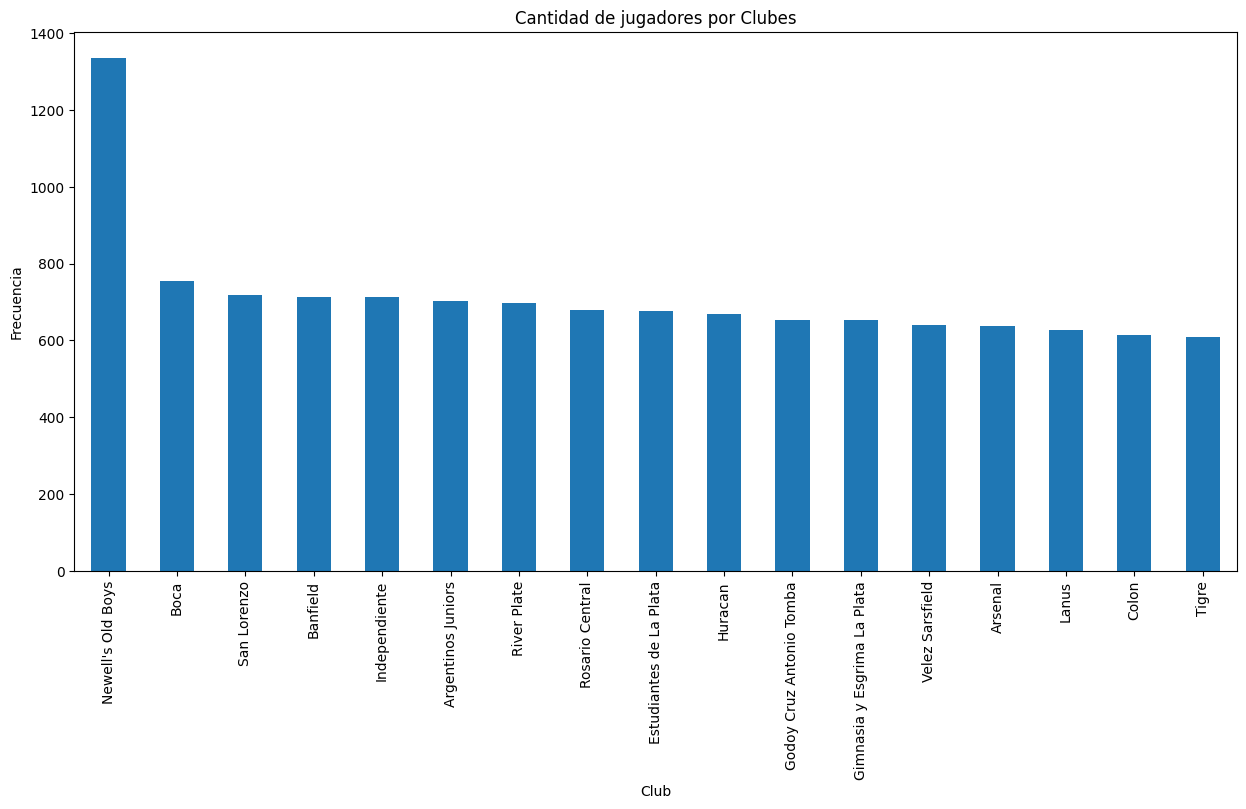

TypeError: 'value' must be an instance of str or bytes, not a float

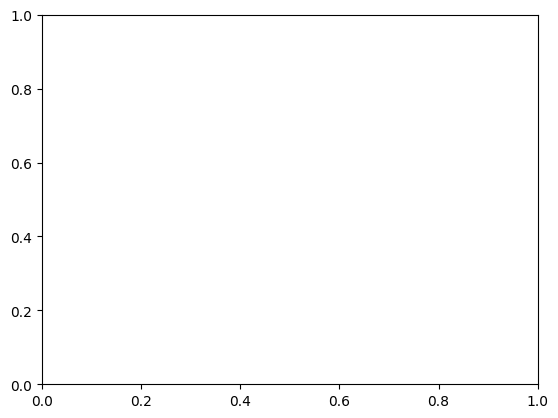

In [287]:
# Visualizo los jugadores por club que hay en el dataset.
import matplotlib.pyplot as plt
jugadoresPorClub = df['Club'].value_counts()

jugadoresPorClub.plot( kind='bar', figsize = (15, 7), title = 'Cantidad de jugadores por Clubes')
plt.xlabel('Club')
plt.ylabel('Frecuencia')
plt.show()
plt.hist( df["Club"] )
# El error que marca es porque hay un futbolista donde el club == NaN, lo corrijo más adelante.

In [ ]:
# Noté que en la columnas Edad hay valores con signos por ejemplo  '†30'.
# Limpia columnas numéricas (sin columnas temporales en el DF)
def limpiarColumnaNumerica(df, col):
    if col not in df.columns:
        print(f"Advertencia: Columna '{col}' no encontrada. Saltando limpieza.")
        return df
    
    # Convertir a string y limpiar en cadena vectorizada
    df[col] = df[col].astype(str).str.strip()  # Limpia espacios
    # Regex genérica: Remueve símbolos comunes (†, +, €, m) y maneja unidades básicas
    df[col] = df[col].str.replace(r'[†€+m]', '', regex=True)  # Para Edad/Altura 
    
    # Convertir a numérico, coerce errores a NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Imputar NaN con mediana (fallback 0 si todo NaN)
    if df[col].isnull().sum() > 0:
        mediana = df[col].median()
        if pd.isna( mediana ):
            mediana = 0
        df[col].fillna( mediana, inplace = True )
        print(f"Limpieza de '{col}': {df[col].isnull().sum()} NaN restantes imputados con mediana {mediana:.2f}")
    
    print(f"Limpieza de '{col}' completada. dtype: {df[col].dtype}, Ejemplos: {df[col].head(3).tolist()}")
    return df

#### Esta función es crucial para transformar datos no estructurados.

In [ ]:
# Limpieza para las columnas numéricas
columnasNumericasLimpieza = ['Edad', 'Altura', 'Valor de mercado']
for col in columnasNumericasLimpieza:
    if col in df.columns:
        df = limpiarColumnaNumerica( df, col )
    else:
        print(f"Advertencia: Columna '{col}' no encontrada.")
# Con esta función, logré incrementar el accuracy de 66% a 100% detallado en el final.

Limpieza de 'Edad' completada. dtype: int64, Ejemplos: [25, 22, 23]
Limpieza de 'Altura': 0 NaN restantes imputados con mediana 1.79
Limpieza de 'Altura' completada. dtype: float64, Ejemplos: [1.75, 1.8, 1.9]
Limpieza de 'Valor de mercado': 0 NaN restantes imputados con mediana 600000.00
Limpieza de 'Valor de mercado' completada. dtype: float64, Ejemplos: [800000.0, 600000.0, 2000000.0]


## Fin de ETL

# Inicio Machine Learning
## Para rellenar los valores faltantes
*   En las variables numericas voy a utilizar Random Forest Regressor 
*   En las variables categoricas usar Random Forest Classifier

In [290]:
from sklearn.ensemble import RandomForestRegressor 

# Funcion para imputar variables numéricas Altura y Valor de mercado con Random Forest Regressor
def imputarColumnaRf( df, columnaObjetivo, columnasPredictoras ):
    # Filtrar solo columnas que existen y son numéricas
    columnasPredictorasExistentes = [col for col in columnasPredictoras if col in df.columns and np.issubdtype(df[col].dtype, np.number)]
    if len( columnasPredictorasExistentes ) == 0:
        print(f"Advertencia: No hay predictoras válidas para {columnaObjetivo}. Usando mediana.")
        mediana = df[columnaObjetivo].median()
        df[columnaObjetivo].fillna( mediana, inplace = True )
        return df
    
    # Dividimos el dataset en entrenamiento y prediccion.
    dfTrain = df[df[columnaObjetivo].notnull()] 
    dfPred = df[df[columnaObjetivo].isnull()] 
    if dfPred.empty:
        return df
    rf = RandomForestRegressor( n_estimators = 100, random_state = 42 )
    rf.fit( dfTrain[columnasPredictorasExistentes], dfTrain[columnaObjetivo] )
    predicciones = rf.predict( dfPred[columnasPredictorasExistentes] )
    df.loc[df[columnaObjetivo].isnull(), columnaObjetivo] = predicciones
    return df

# Aplicamos la función creada usando Edad como predictor principal
predictorasNumericas = ['Edad']
if 'Valor de mercado' in df.columns:
    predictorasNumericas.append('Valor de mercado')

In [291]:
# Imputamos las variables categóricas con pocos nulos reemplazandolos con la moda
columnasPocosNulos = ['Pie', 'Club']
for col in columnasPocosNulos:
    if col in df.columns and df[col].isnull().sum() > 0:
        moda = df[col].mode()
        if len(moda) > 0:
            df[col].fillna(moda[0], inplace = True)
        else:
            df[col].fillna('Desconocido', inplace = True)

In [292]:
# Imputamos variables categóricas con muchos nulos con categoría "Desconocido"
if 'Fichado' in df.columns:
    df['Fichado'].fillna('Desconocido', inplace = True)

In [293]:
# Preparamos variables para imputar "Equipo Anterior"
target = 'Equipo Anterior'
if target not in df.columns:
    print(f"Error: Columna target '{target}' no encontrada. Verifica nombres.")

In [294]:
# Lista de categóricas para unificar a string y manejar NaN
categoricas = ['Posicion', 'Pie', 'Fichado', 'Temporada', 'Club']
if target in df.columns:
    categoricas.append( target )
for col in categoricas:
    if col in df.columns:
        # Llenar NaN restantes con 'Desconocido'
        if df[col].isnull().sum() > 0:
            df[col].fillna('Desconocido', inplace = True)
        # Convertir todo a string para uniformidad
        df[col] = df[col].astype(str)
    else:
        print(f"Advertencia: Columna '{col}' no encontrada. Saltando.")

#### Utilizamos Label Encoder para convertir columnas categóricas nominales (Posicion, Pie) en códigos numéricos. Ya que los modelos de sklearn esperan inputs numéricos.


In [295]:
from sklearn.preprocessing import LabelEncoder

# Codificamos las variables categóricas predictoras con LabelEncoder
leDict = {}
columnasEncoded = []  # Para rastrear qué se codificó
predictorasCategoricas = ['Posicion', 'Pie', 'Fichado', 'Temporada', 'Club']

for col in predictorasCategoricas:
    if col in df.columns:
        try:
            le = LabelEncoder()
            df[col + '_encoded'] = le.fit_transform( df[col] )
            leDict[col] = le
            columnasEncoded.append(col + '_encoded')
            print(f"Codificado exitosamente: {col}")
        except Exception as e:
            print(f"Error al codificar '{col}': {e}. Saltando esta columna.")
    else:
        print(f"Advertencia: Columna '{col}' no encontrada. Saltando.")

Codificado exitosamente: Posicion
Codificado exitosamente: Pie
Codificado exitosamente: Fichado
Codificado exitosamente: Temporada
Codificado exitosamente: Club


#### A continuación lo que hago es convertir el target categórico en códigos numéricos para compatibilidad con RF, que no maneja strings directamente.

In [296]:
# Codificamos el target "Equipo Anterior"
leTarget = None
if target in df.columns:
    try:
        leTarget = LabelEncoder()
        df[target + '_encoded'] = leTarget.fit_transform( df[target] ) # Crea una columna nueva sin sobrescribir la original
        print(f"Target codificado exitosamente: {target}")
    except Exception as e:
        print(f"Error al codificar target '{target}': {e}")
        df[target].fillna('Desconocido', inplace = True)
        print("Imputación manual para target completada.")

Target codificado exitosamente: Equipo Anterior


#### Selección dinámica de predictoras filtradas por tipo y existencia para la imputación de 'Equipo Anterior' con RF.

In [297]:
# Definimos las predictoras numéricas limpias + Categóricas encoded.
predictors = []
columnasNumericasPredictoras = ['Edad', 'Altura', 'Valor de mercado']
for col in columnasNumericasPredictoras:
    if col in df.columns and np.issubdtype(df[col].dtype, np.number):
        predictors.append(col)

# Agregar encoded solo si se crearon
for encCol in columnasEncoded:
    if encCol in df.columns:
        predictors.append( encCol )
print(f"\nPredictoras finales usadas: {predictors}")


Predictoras finales usadas: ['Edad', 'Altura', 'Valor de mercado', 'Posicion_encoded', 'Pie_encoded', 'Fichado_encoded', 'Temporada_encoded', 'Club_encoded']


#### Imputación supervisada de 'Equipo Anterior'

In [298]:
from sklearn.ensemble import RandomForestClassifier

# Identificamos el índice de 'Desconocido' en target (si existe encoded)
idxDesconocido = -1
if leTarget is not None:
    try:
        idxDesconocido = leTarget.transform(['Desconocido'])[0]
    except:
        idxDesconocido = -1  # Fallback

    dfTrain = df[df[target + '_encoded'] != idxDesconocido]
    dfPred = df[df[target + '_encoded'] == idxDesconocido]
    
    if len( dfTrain ) > 0 and len( dfPred ) > 0:
        rfClf = RandomForestClassifier( n_estimators = 100, random_state = 42)
        rfClf.fit( dfTrain[predictors], dfTrain[target + '_encoded'] )
        
        # Predecir
        prediccionesEncoded = rfClf.predict( dfPred[predictors] )
        
        # Asignar predicciones y decodificar
        df.loc[df[target + '_encoded'] == idxDesconocido, target + '_encoded'] = prediccionesEncoded
        df[target] = leTarget.inverse_transform( df[target + '_encoded'].astype(int) )
        
        print("Imputación de 'Equipo Anterior' completada con RF Classifier.")
    else:
        print("Advertencia: No hay datos de entrenamiento suficientes. Imputando manualmente con 'Desconocido'.")
        df[target].fillna('Desconocido', inplace = True)
else:
    print("No se puede entrenar el modelo. Imputando manualmente con 'Desconocido'.")
    if target in df.columns:
        df[target].fillna('Desconocido', inplace = True)

Imputación de 'Equipo Anterior' completada con RF Classifier.


In [ ]:
# Precisión del modelo.
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split( dfTrain[predictors], dfTrain[target + '_encoded'], test_size = 0.2, random_state = 42 )
acc = rfClf.score( xTest, yTest )
print(f"Accuracy en test: {acc:.2f}")

Accuracy en test: 1.00
